In [27]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [1]:
df_raw = pd.read_csv("rawdata/통신고객이탈.csv")

NameError: name 'pd' is not defined

In [29]:
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [30]:
df_raw.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [31]:
df_raw = df_raw.drop(["CUSTOMER_ID"], axis = 1)

In [32]:
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [33]:
import numpy as np
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw["GENDER"] = np.where(df_raw["GENDER"] == "F", 0, 1)

In [34]:
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,0,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,1,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,1,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,1,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,0,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [38]:
df_raw = pd.get_dummies(df_raw)

In [39]:
df_raw.head()

,CHURN,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,0,31,33.33,6,218,379.8,9,21.6,366,...,0,0,0,0,0,0,1,0,0,0
1,0,1,27,30.87,10,373,656.4,11,28.0,411,...,0,0,0,0,0,0,1,0,0,0
2,0,1,27,49.40,11,260,582.0,0,0.0,265,...,0,0,0,0,0,0,1,0,0,0
3,0,1,61,48.60,1,294,661.8,14,101.5,326,...,0,0,0,0,0,0,1,0,0,0
4,0,0,52,56.03,0,221,555.6,7,25.0,274,...,0,0,0,0,0,0,1,0,0,0


### 모델 생성 - 기본 옵션으로 모델 생성

In [40]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

In [41]:
df_train_y = df_train["CHURN"]
df_train_x = df_train.drop(["CHURN"], axis = 1)
df_test_y = df_test["CHURN"]
df_test_x = df_test.drop(["CHURN"], axis = 1)

In [45]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

# 과대적합

Accuracy on training set: 0.991
Accuracy on test set: 0.896


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimator in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimator, random_state = 42)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimator"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [52]:
df_accuracy_n.round(3)

,n_estimator,TrainAccuracy,TestAccuracy
0,10,0.991,0.918
1,20,0.994,0.903
2,30,0.997,0.903
3,40,0.997,0.896
4,50,0.997,0.907
5,60,0.997,0.903
6,70,0.998,0.900
7,80,0.998,0.903
8,90,1.000,0.903
9,100,1.000,0.903


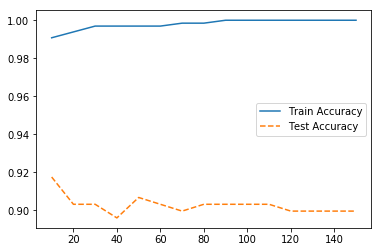

In [54]:
plt.plot(para_n_tree, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [58]:
oob_error = []

for v_n_estimator in range (1, 151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 42)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not hav

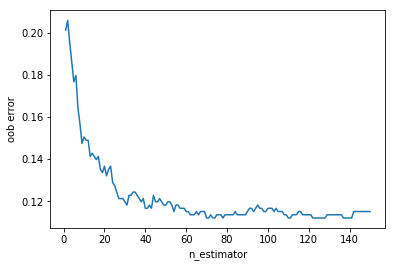

In [60]:
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimator")

n_estimators = 100

In [63]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range (1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(n_estimators = 50, max_depth = v_max_depth, random_state = 42)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.791,0.842
1,2,0.791,0.842
2,3,0.843,0.857
3,4,0.886,0.882
4,5,0.905,0.896
5,6,0.928,0.918
6,7,0.939,0.903
7,8,0.945,0.907
8,9,0.949,0.910
9,10,0.959,0.907


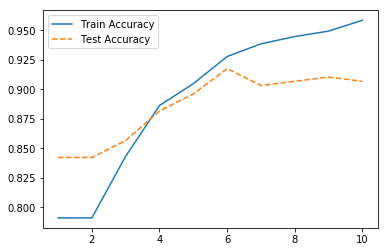

In [64]:
plt.plot(para_depth, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [70]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, n_estimators = 50, max_depth = 6, 
                                random_state = 42)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.897,0.910
1,20,0.909,0.907
2,30,0.899,0.903
3,40,0.891,0.896
4,50,0.883,0.896
5,60,0.876,0.892
6,70,0.880,0.892
7,80,0.877,0.896
8,90,0.876,0.896
9,100,0.874,0.889


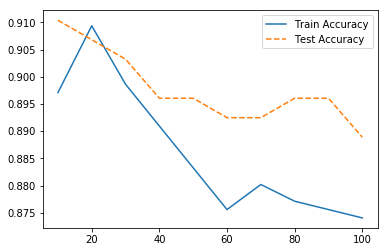

In [71]:
plt.plot(para_split, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [79]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 20, 
                                n_estimators = 50, max_depth = 6, random_state = 42)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.879,0.878
1,20,0.836,0.860
2,30,0.791,0.842
3,40,0.791,0.842
4,50,0.791,0.842
5,60,0.791,0.842
6,70,0.791,0.842
7,80,0.791,0.842
8,90,0.791,0.842
9,100,0.791,0.842


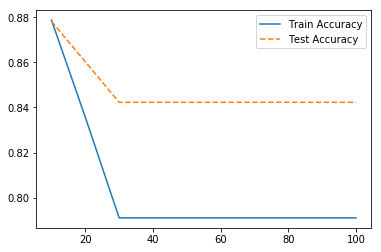

In [80]:
plt.plot(para_leaf, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()